In [3]:
import warnings
warnings.filterwarnings('ignore')

# Cross Val Intuition

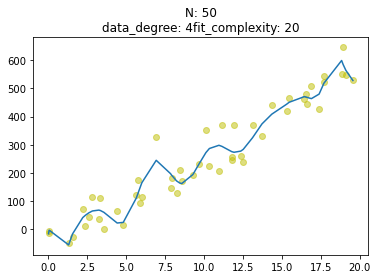

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1):
    N = num_samps

    np.random.seed(seed=23)

    # gen rand x vals
    x = np.random.rand(N)*20

    # define polynomials
    if degree==1:
        y = 5*x + 3
    if degree==2:
        y = 3*x**2 + 5*x + 3
    if degree==3:
        y = -0.2*x**3 + 3*x**2 + 5*x + 3
    if degree==4:
        y = 0.006*x**4 + -0.2*x**3 + 3*x**2 + 5*x + 3

    
    # get scatter range
    y_val_range = np.ptp(y)

    # add normal noise
    y = [pt + np.random.normal(loc=0.0, scale=((1./10)*y_val_range)) for pt in y]


    # draw a line
    fit_complexity_ = fit_complexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity_))(np.unique(x))


    # plot
    plt.title(f'N: {N}\n' + \
              f'data_degree: {degree}' + \
              f'fit_complexity: {fit_complexity}'
              )

    plt.scatter(x, y, c='y', alpha=0.5)
    plt.plot(np.unique(x), regr)

    plt.show()


plot_scatter_fit(num_samps=50, fit_complexity=20, degree=4)

# ML Workflow

## 1. Import/Clean/Reshape Data

In [19]:
ls data

iris.data.txt


In [22]:
# load libraries
import pandas as pd

# define columns/features
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# load data
df = pd.read_csv('data/iris.data.txt', header=None, names=names)

df.tail(10);

In [26]:
columns = df.columns
columns;

In [27]:
# what are the different flowers?
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
len(df)

150

In [29]:
break_at = 10

for row in df['sepal_width']:
    print(row)

    break_at -= 1
    if break_at <= 0: break

3.5
3.0
3.2
3.1
3.6
3.9
3.4
3.4
2.9
3.1


## Plot Data

In [30]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

y = df[['class']]